### Overview of Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Control dataframe
spotify = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(f"Columns: {len(spotify.columns)}")
print(f"Rows: {len(spotify)}")
dtypes = pd.DataFrame(spotify.dtypes)
dtypes.rename(columns={0: "Data type"})

Columns: 24
Rows: 953


,Data type
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


### Basic Descriptive Statistics

In [5]:
# Created a new spotify dataframe wherein the values in streams are modified
# Gets the contents of the column 'streams' and converts the contents to a value
# errors = 'coerce' will modify the non numeric value to NaN
# errors = 'coerce' are necessary since some of the values in the streams columns are not numbers
spotifyc = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")
spotifyc['streams'] = pd.to_numeric(spotifyc['streams'], errors = 'coerce')
# Uses the describe() function to get the statistics of the streams column
# Uses loc to only show mean, 50%, and std
# The median is '50%' since the definition of median is the middle value hence 50%
# Uses apply function since the output without it is in a scientific notation. This changes it to show decimal #'s
# Uses rename function to rename '50%' to median
# Combined describe(), loc[], apply(), rename() functions into a single code line for better readability
spotifyc['streams'].describe().loc[["mean","50%","std"]].apply("{0:.5f}".format).rename(index={'50%': 'median'})

mean      514137424.93908
median    290530915.00000
std       566856949.03888
Name: streams, dtype: object

In [6]:
def outliers(df):
    q1, q3 = np.percentile(df, [25,75])
    iqr = q3 - q1
    outliers = df[((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr)))]
    return outliers

In [7]:
def bas_des_st(df,name,x,y,figsizex,figsizey,width = 0.2):
    out = outliers(df[name])
    out_df = pd.DataFrame(out)
    bin = plt.hist(df[name],bins = 'auto')[1]
    plt.close()
    print("Total # of freq. of outliers: "+ str(len(out)))
    print("max outlier value: "+ str(out.max()))
    print("min outlier value: "+ str(out.min()))
    print("Outlier ranges from " + str(out.min()) + " to " + str(out.max()))
    f,a = plt.subplots(x,y,figsize = (figsizex,figsizey))
    a[0].hist(df[name], bins = bin,color = 'cornflowerblue',width = width)
    a[0].set_ylabel('Frequency')
    a[0].set_title(f'{name} distribution')

    a[1].hist(df[name],label = f'{name} distribution', bins = bin,color = 'cornflowerblue',width = width)
    a[1].hist(out_df, label = 'Outliers', bins = bin, color = 'Orange',width = width)
    a[1].set_title('w/ Outliers overlayed')
    a[1].set_ylabel('Frequency')
    a[1].legend()
    f.supxlabel(name, fontsize = 25, y = 0.0005)
    plt.show()

Total # of freq. of outliers: 27
max outlier value: 8
min outlier value: 4
Outlier ranges from 4 to 8


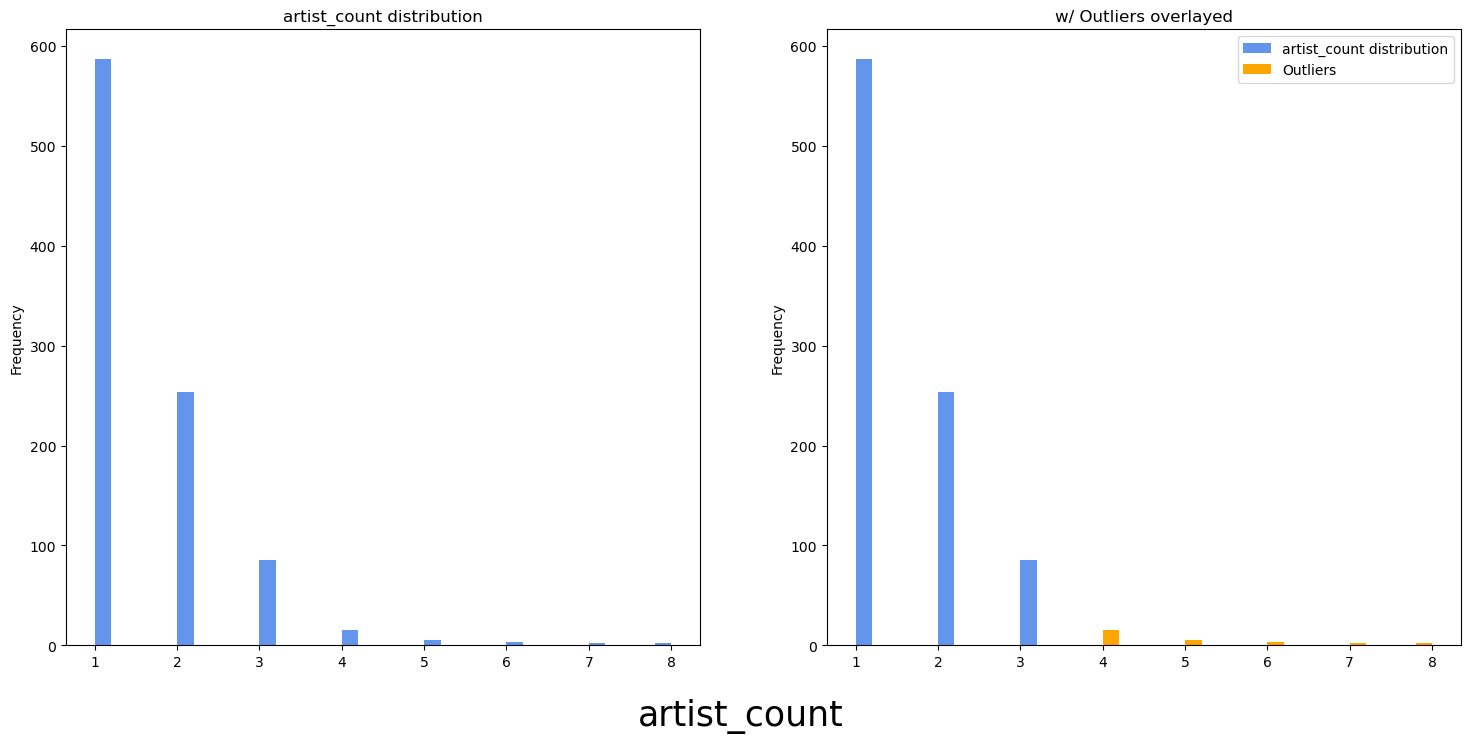

In [8]:
bas_des_st(spotify,'artist_count', 1, 2, 18, 8)

Total # of freq. of outliers: 151
max outlier value: 2016
min outlier value: 1930
Outlier ranges from 1930 to 2016


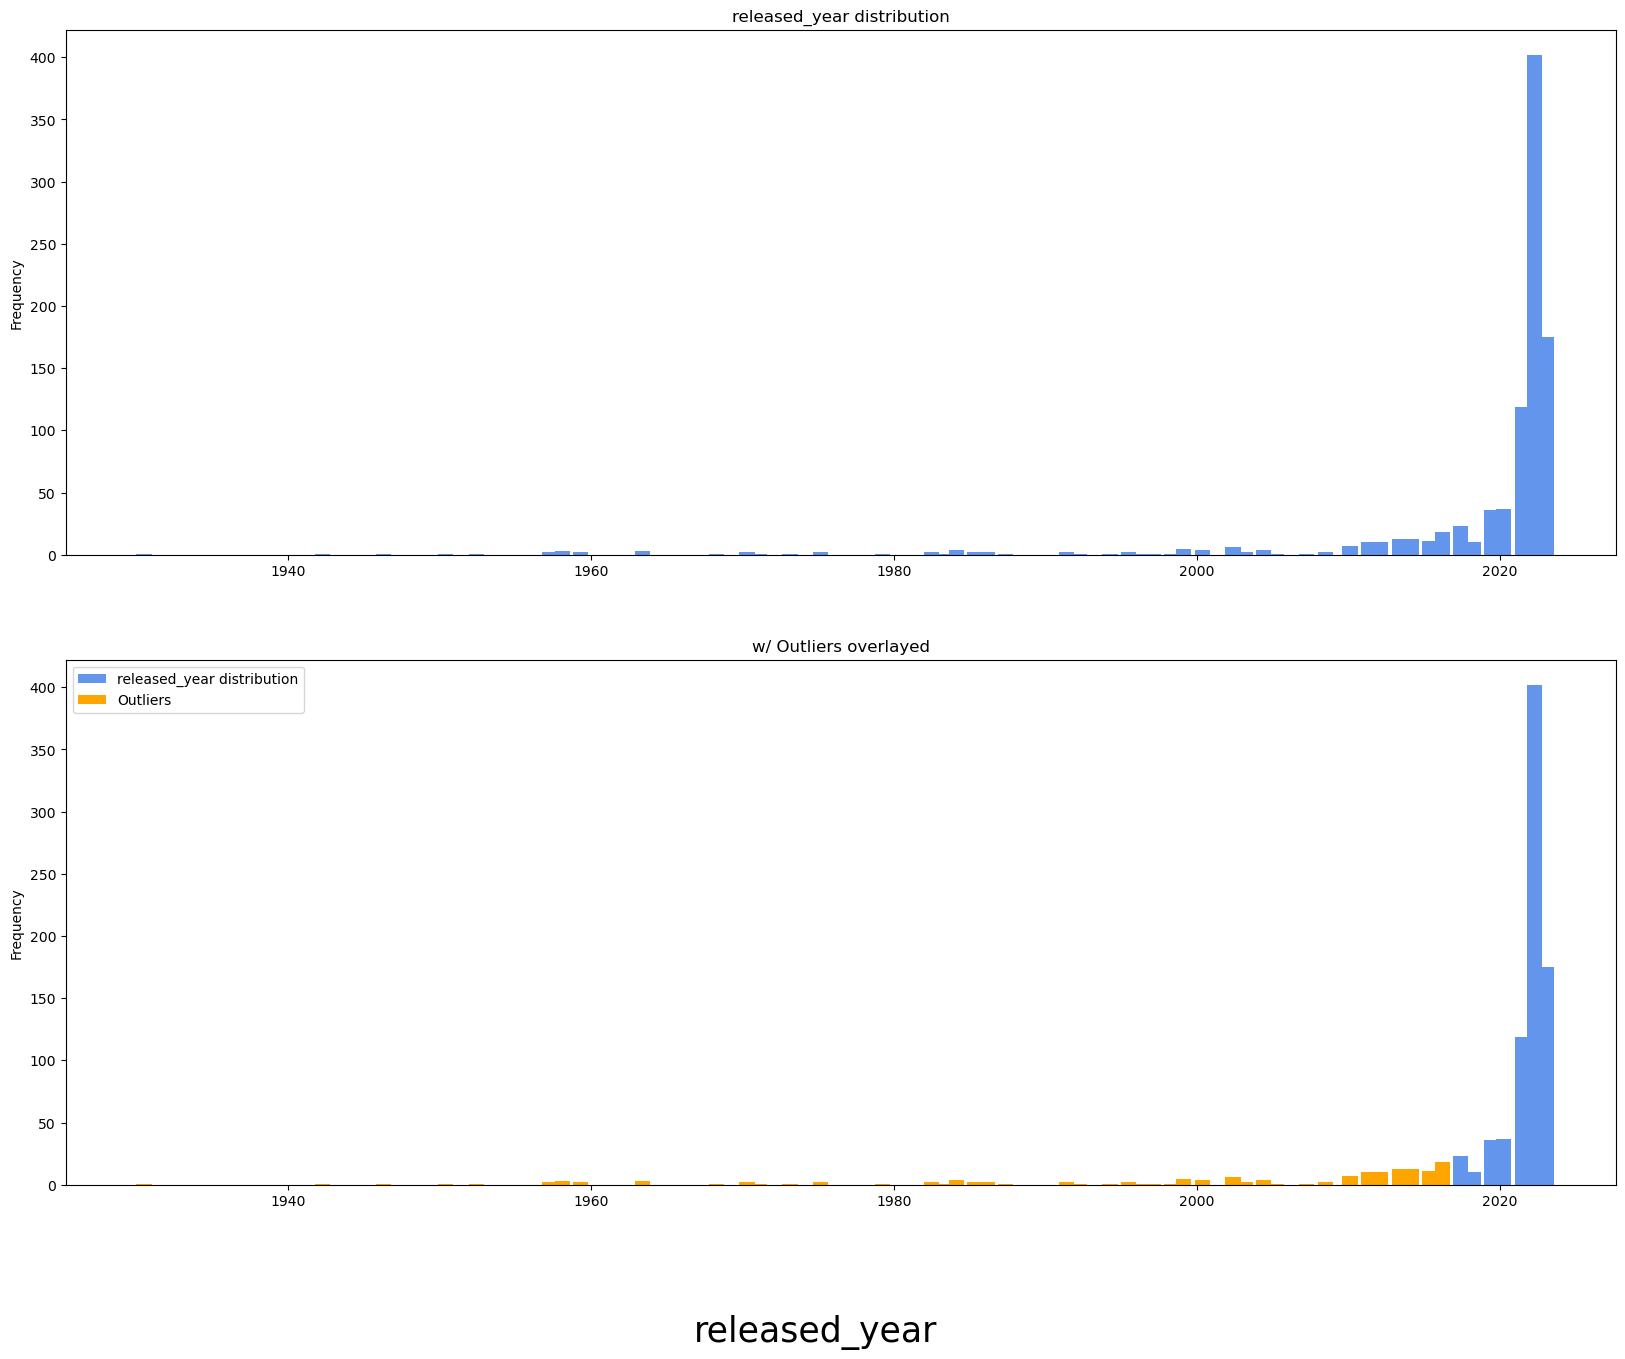

In [9]:
bas_des_st(spotify,'released_year', 2, 1, 20, 15, 1)

### Top Performers

In [11]:
# Uses nlargest() function to get the rows with the highest streams
# '5' parameter so that it only shows the top 5

top5streams = spotifyc.nlargest(5, 'streams')
top5streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,125,"1,800",0,NaN,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,167,"3,595",6,NaN,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5


In [12]:
# Uses value_counts() function as a frequency count for the artist with the most released tracks
top5artist = spotify['artist(s)_name'].value_counts()[:5]
# Stores the top5artist variable into a DataFrame and then uses reset_index() to remove the artist(s)_name from the index and seperate it independently via a column
t5adf = pd.DataFrame(top5artist).reset_index()
# renames the first column and second column for better readability
t5adf.rename(columns={"artist(s)_name":"Artist Name","count": "Tracks released"})

,Artist Name,Tracks released
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


### Temporal Trends
##### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

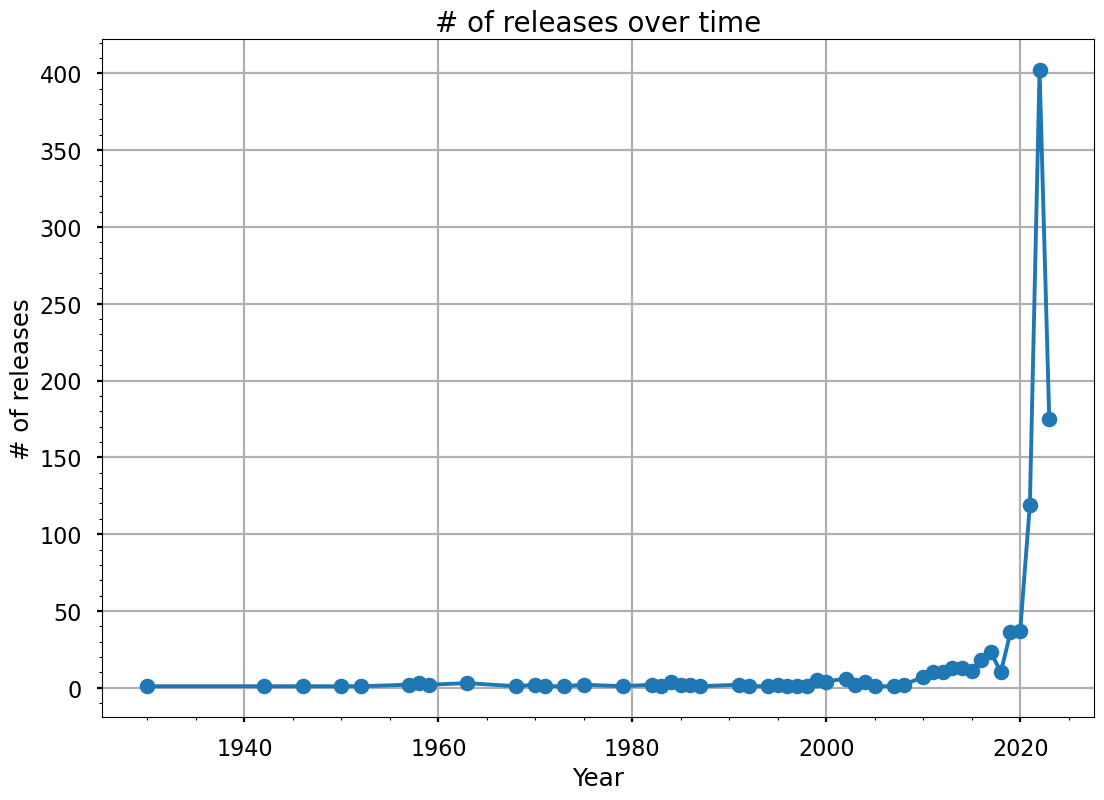

In [67]:
def temptrends(df, date):
    # Put into a dataframe the frequency count of the released_year
    # The frequency count of the released year represents the # of tracks released that year since a row represent a single track
    # The frequency count is obtained using the function .value_counts()
    # Stores that dataframe into the 'dt' variable
    dt = pd.DataFrame(df[date].value_counts())
    # First it calls the function reset_index() to remove the year from the index and seperate it independently via a column
    # then it sorts the values of the years in descending order since the basis is over time
    dt1 = dt.reset_index().sort_values(by = [date], ascending = False)
    # stores the years in yrsorted using the iloc function
    # iloc is used to make the code shorter
    dtsorted = dt1.iloc[:,0]
    # puts into a list the sorted years using the to_list() function
    dtlist = dtsorted.to_list()
    # Stores the number of releases per year in numreleasesorted using the iloc function
    nrel_sorted = dt1.iloc[:,1]
    # puts into a list the sorted # of releases yearly using the to_list() function
    nrslist = nrel_sorted.to_list()
    return dtlist, nrslist
yrs, release = temptrends(spotify,"released_year")


# add labels to the x and y for better readability
plt.xlabel("Year")
plt.ylabel("# of releases")
# Plots the # of tracks released over time
# With # of tracks released in the Y axis
# and the years in the X axis
plt.plot(yrs, release,"-o")
plt.style.use('seaborn-v0_8-poster')
plt.title('# of releases over time', fontsize = 20)
plt.minorticks_on()
plt.grid()

##### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

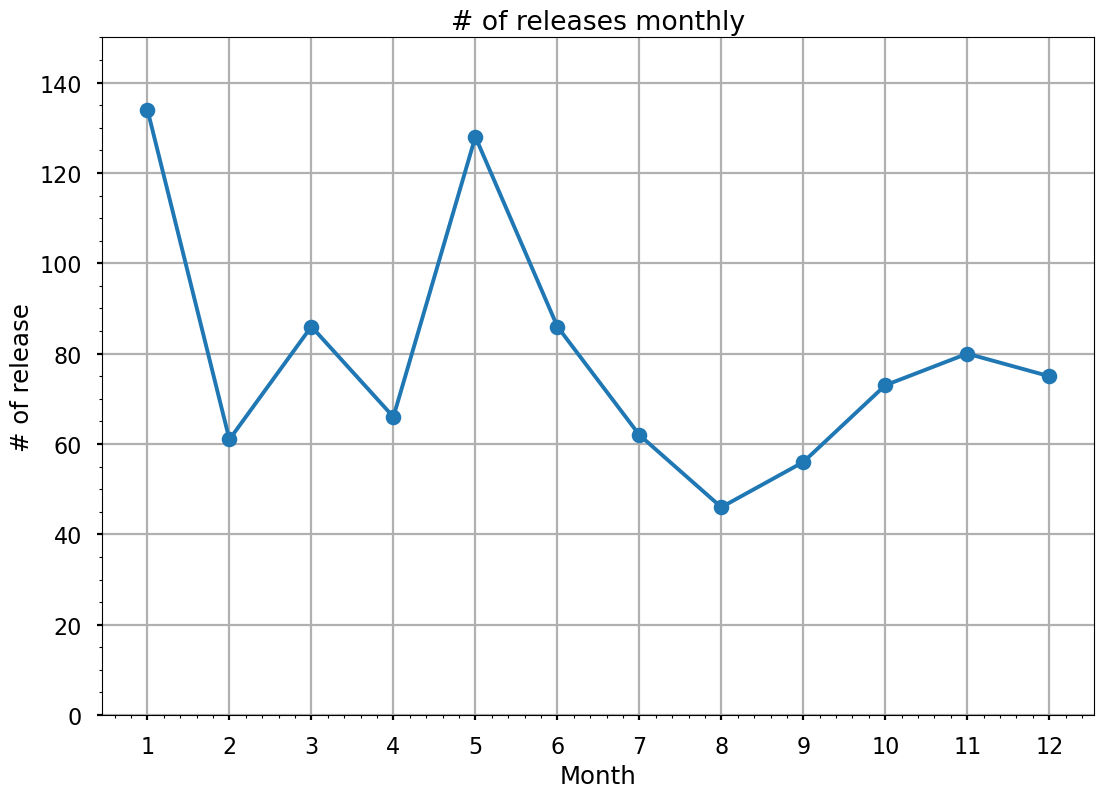

In [16]:
month, release2 = temptrends(spotify, "released_month")
plt.xlabel("Month")
plt.ylabel("# of release")
plt.plot(month, release2, "-o")
plt.ylim(0,150)
plt.title('# of releases monthly')
plt.minorticks_on()
plt.xticks(np.arange(1, 13, step=1))
plt.grid()

In [17]:
monthreleases = spotify['released_month'].value_counts()[:1]
mrdf = pd.DataFrame(monthreleases).reset_index()
mrdf.rename(columns={"count": "# of releases"})

,released_month,# of releases
0,1,134


#### Question 2:
##### The month with the most release is January or the first month of the year

### Genre and Music Characteristics

In [20]:
streamsc_df = spotifyc['streams']

In [21]:
mchar_df = pd.DataFrame({
    'bpm': spotify['bpm'],
    'danceability_%': spotify['danceability_%'],
    'valence_%': spotify['valence_%'],
    'energy_%': spotify['energy_%'],
    'acousticness_%': spotify['acousticness_%'],
    'instrumentalness_%': spotify['instrumentalness_%'],
    'liveness_%': spotify['liveness_%'],
    'speechiness_%': spotify['speechiness_%']
})

In [22]:
def corrinterp(val):
    if not isinstance(val, (int, float)) or val < -1 or val > 1:
        return "Invalid input: r must be a number between -1 and 1."
    if val == 1:
        return "Perfect positive correlation"
    elif val == -1:
        return "Perfect negative correlation"
    elif val == 0:
        return "No correlation"
    elif 0 < val < 0.3:
        return "Weak positive correlation"
    elif 0.3 <= val < 0.7:
        return "Moderate positive correlation"
    elif 0.7 <= val < 1:
        return "Strong positive correlation"
    elif -0.3 < val < 0:
        return "Weak negative correlation"
    elif -0.7 < val <= -0.3:
        return "Moderate negative correlation"
    elif -1 < val <= -0.7:
        return "Strong negative correlation"
# Check reference section in the README.md for the references of the values indicated here (-1,1,0,0.3,0.7,-0.3,-0.7).

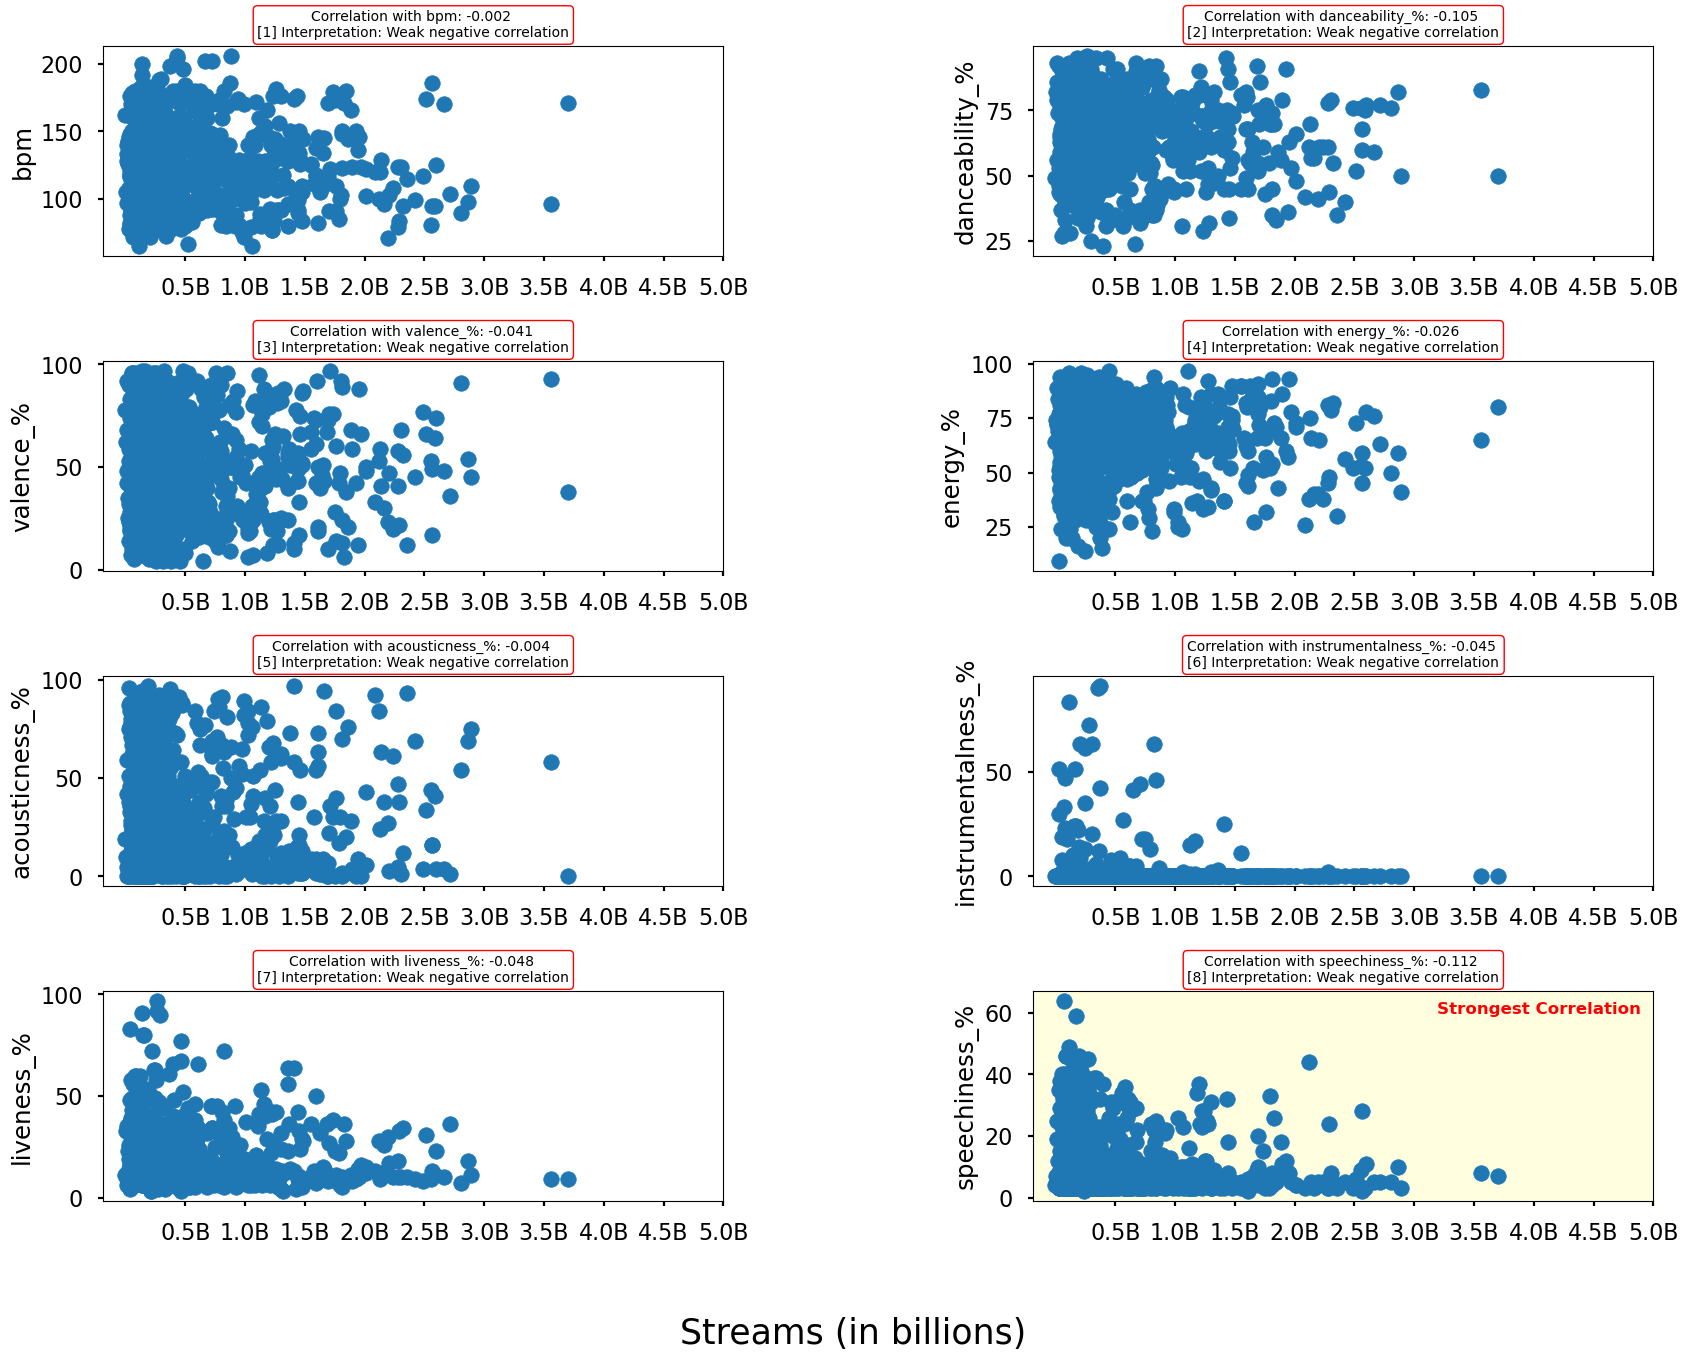

In [23]:
f, a = plt.subplots(nrows = 4, ncols = 2, figsize = (20,15))
a = a.flatten()

max_correlation = -np.inf
max_index = -1
for i, col in enumerate(mchar_df.columns):
    a[i].scatter(streamsc_df, mchar_df[col])
    a[i].set_ylabel(col)
    x_ticks = a[i].get_xticks()+1e9
    x_labels = [f'{x / 1e9:.1f}B' for x in x_ticks]
    a[i].set_xticks(x_ticks)
    a[i].set_xticklabels(x_labels)
    correlation = spotifyc['streams'].corr(mchar_df[col], method = 'pearson')
    #correlation+=1
    if abs(correlation) > max_correlation:
        max_correlation = abs(correlation)
        max_index = i
    interp = corrinterp(correlation)
    a[i].text(0.5, 1.1, f"Correlation with {col}: {correlation:.3f} \n[{i+1}] Interpretation: {interp}",ha = 'center' ,va = 'center', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round',linewidth = 1), transform=a[i].transAxes)
    
if max_index != -1:
    a[max_index].patch.set_facecolor('lightyellow')
    a[max_index].text(0.98, 0.95, f'Strongest Correlation', ha='right', va='top', fontsize=12, fontweight='bold', color='red', transform=a[max_index].transAxes)   

f.supxlabel('Streams (in billions)', fontsize = 25, y = 0.01)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

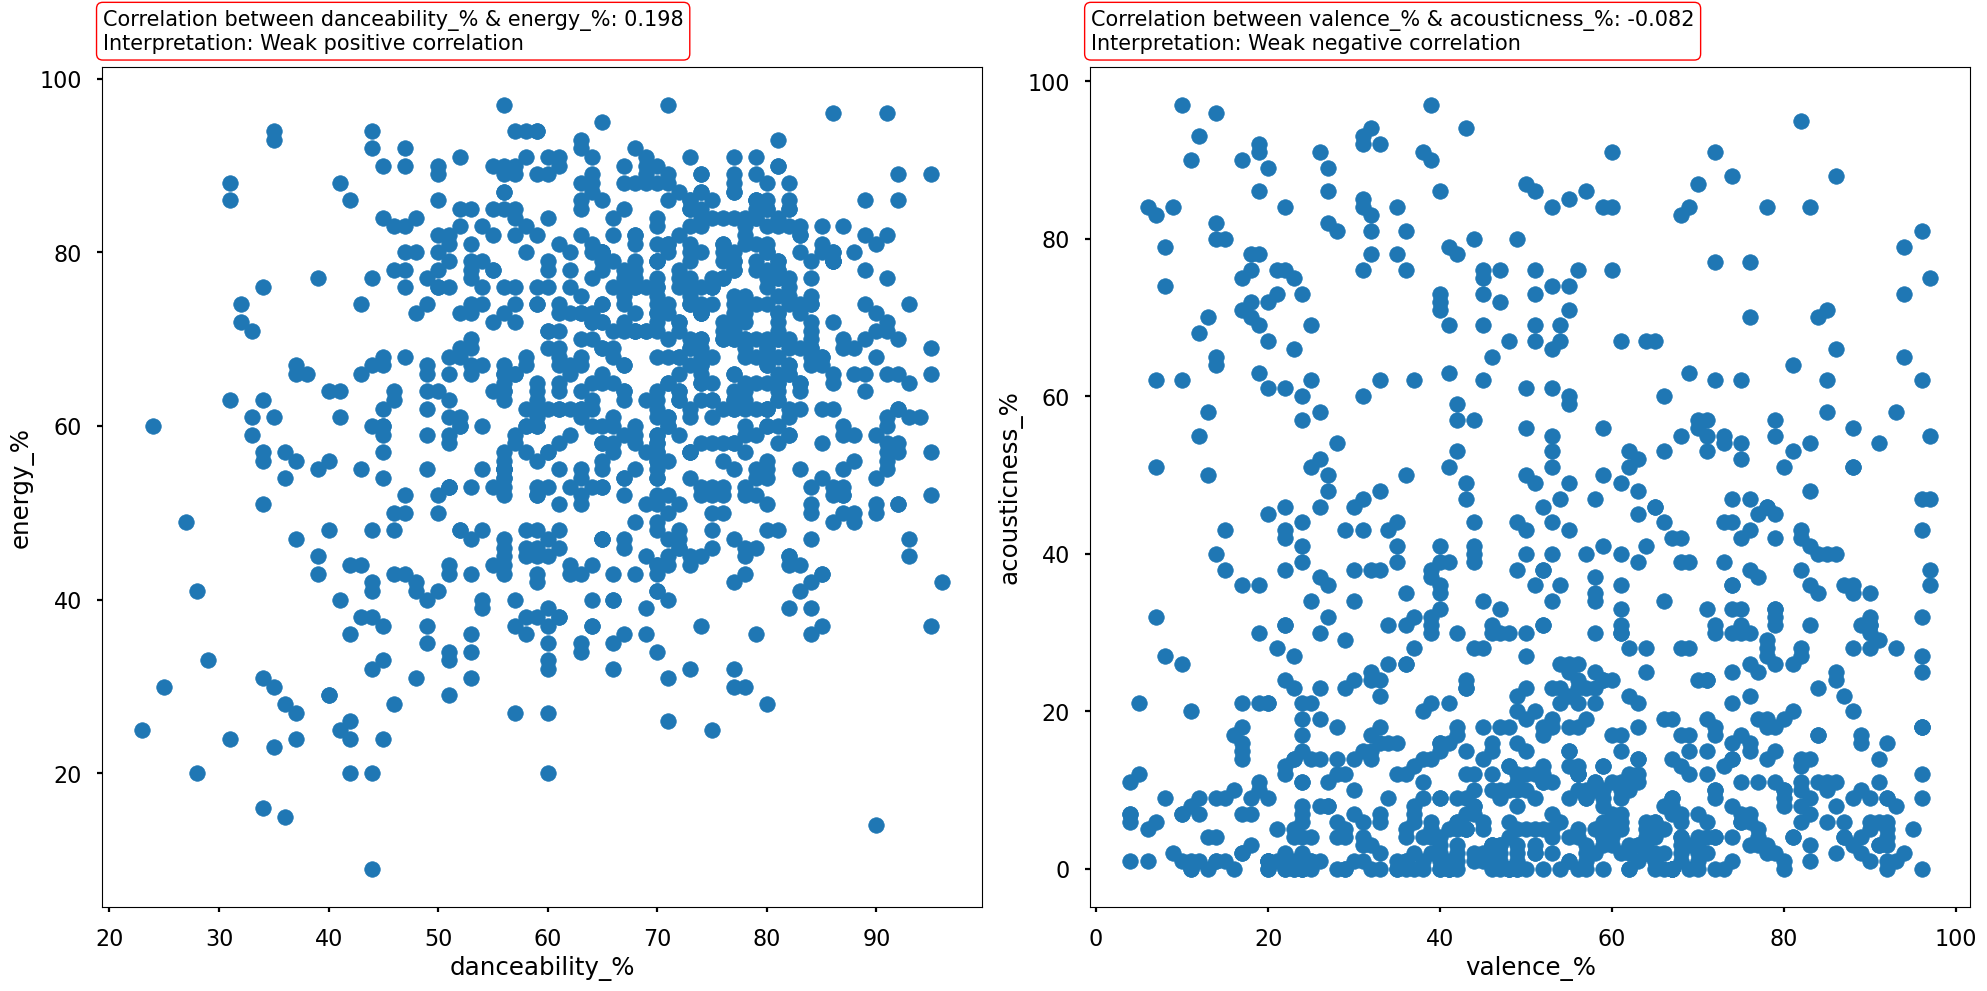

In [24]:
def corr(df, name1, name2, a):
    a.scatter(df[name1], df[name2])
    mc_corr = df[name1].corr(df[name2], method='pearson')
    mc_interp = corrinterp(mc_corr)
    a.set_xlabel(name1)
    a.set_ylabel(name2)
    a.text(0.0005, 1.02, f"Correlation between {name1} & {name2}: {mc_corr:.3f}\nInterpretation: {mc_interp}",fontsize=15, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round',linewidth = 1), transform=a.transAxes)
f, a = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

corr(mchar_df, 'danceability_%', 'energy_%', a[0])
corr(mchar_df, 'valence_%', 'acousticness_%', a[1])


plt.tight_layout()
plt.show()

### Platform Popularity

52898 [52898, 147, 672]


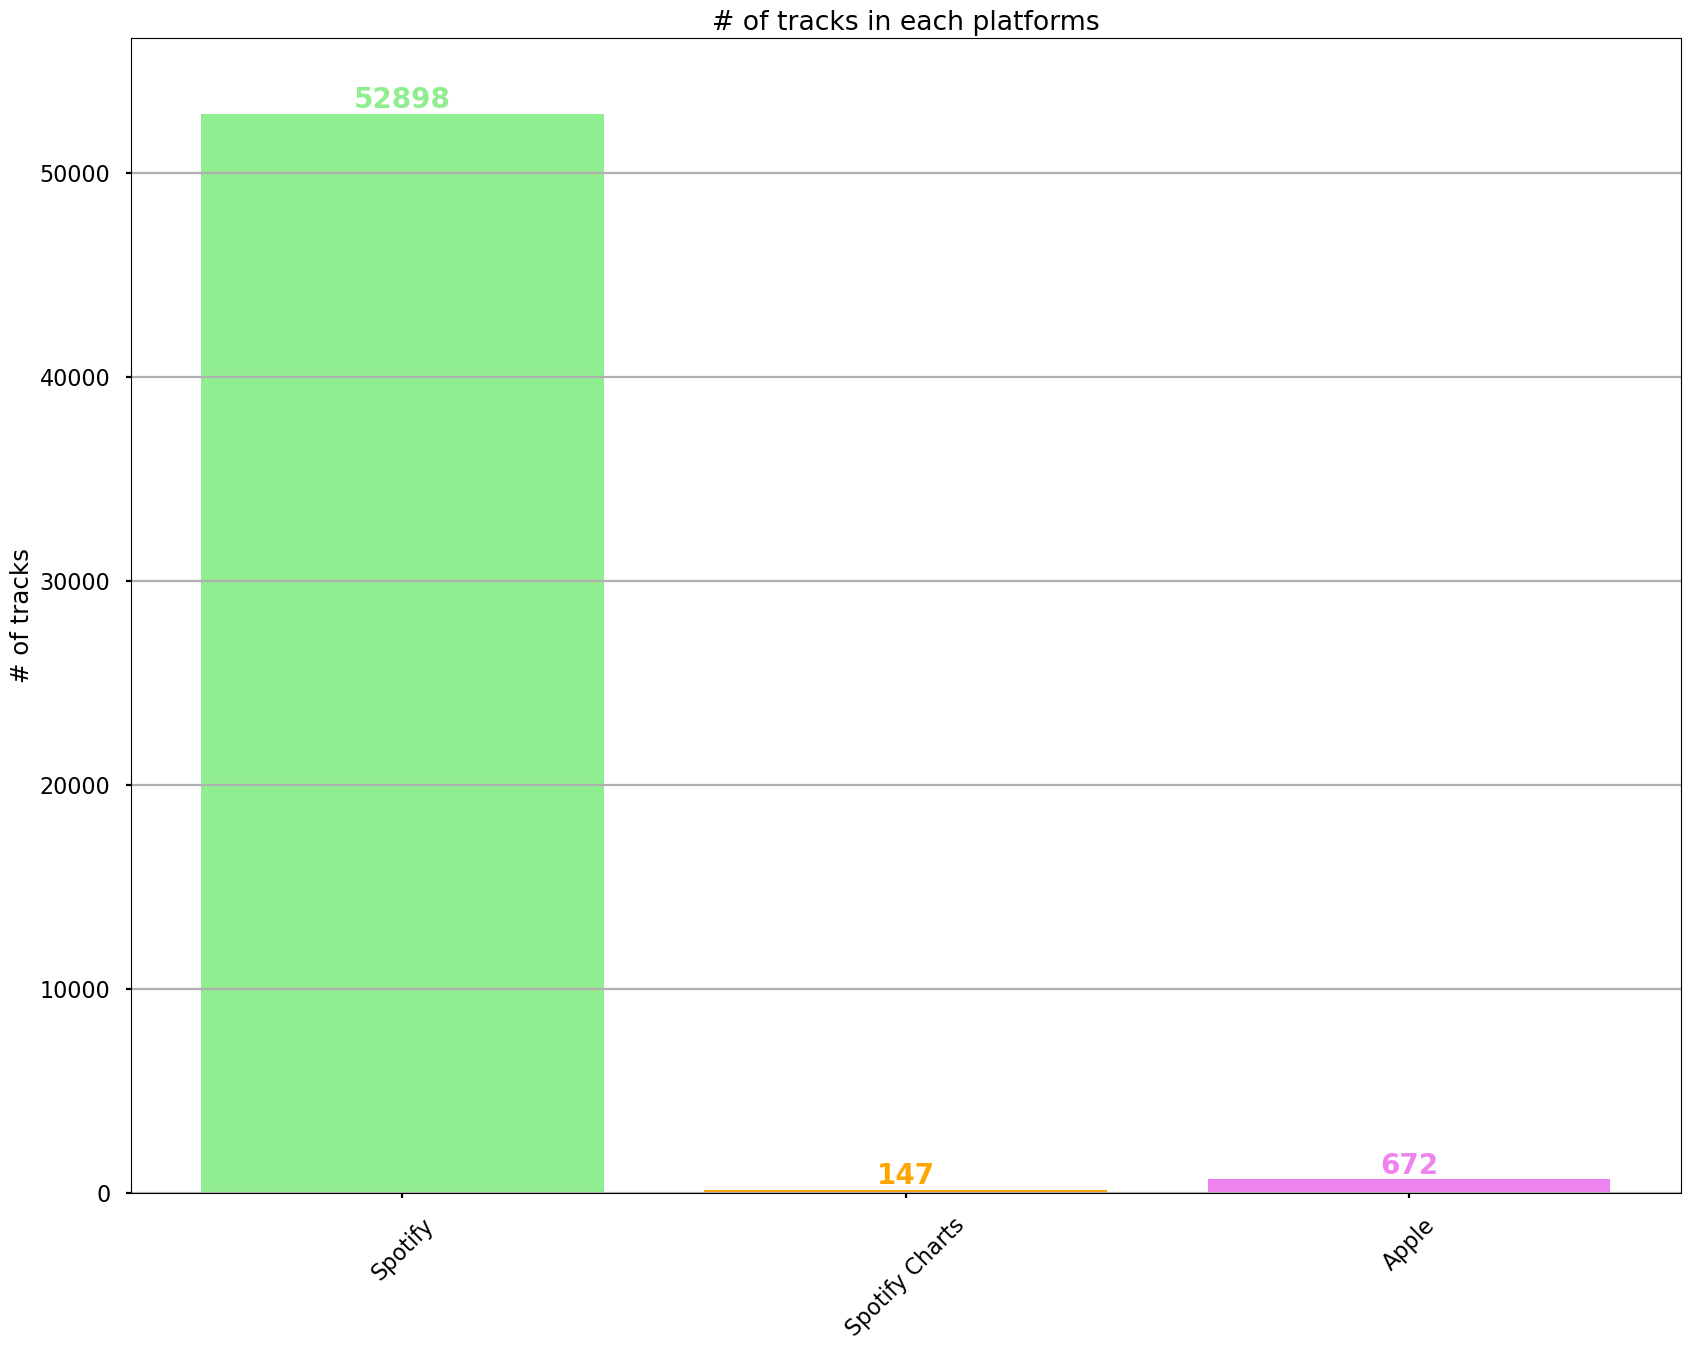

In [26]:
platforms_df = pd.DataFrame({'Spotify':spotify['in_spotify_playlists'],
                             'Spotify Charts':spotify['in_spotify_charts'],
                             'Apple':spotify['in_apple_playlists']})

plt.figure(figsize=(20, 15))
bars = plt.bar(range(len(platforms_df.max())), platforms_df.max(), color=['lightgreen', 'orange', 'violet'])
plt.title('# of tracks in each platforms')
plt.ylabel('# of tracks')
plt.xticks(range(len(platforms_df.max())), platforms_df.columns, rotation = 45)
plt.grid(axis= 'y')

plt.ylim(0, platforms_df.max().max()*1.07)

lis = [] # debugging purposes
for bar in bars:
    yval = bar.get_height()
    lis.append(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=20, color = bar.get_facecolor(), fontweight = 'bold')
print(f"{platforms_df.max().max()} {lis}") # debugging purposes
plt.show()

### Advanced Analysis

In [28]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


# SCRATCH CODES

In [30]:
spotify['in_spotify_playlists'].max()

52898

In [31]:
%%capture
"""
outliers1 = outliers(spotify['artist_count'])
outliers_df = pd.DataFrame(outliers1)
bins1 = plt.hist(spotify['artist_count'], bins='auto')[1]
"""

In [32]:
%%capture
"""
print("Total # of freq. of outliers: "+ str(len(outliers1)))
print("max outlier value: "+ str(outliers1.max()))
print("min outlier value: "+ str(outliers1.min()))
print("Outlier ranges from " + str(outliers1.min()) + " to " + str(outliers1.max()))
f1,a1 = plt.subplots(1,2,figsize = (18,8))
a1[0].hist(spotify['artist_count'], bins = bins1,color = 'cornflowerblue')
a1[0].set_ylabel('Frequency')
a1[0].set_xlabel('Artist Count')
a1[0].set_title('Artist count distribution')

a1[1].hist(spotify['artist_count'],label = 'Artist count distribution', bins = bins1,color = 'cornflowerblue')
a1[1].hist(outliers_df, label = 'Outliers', bins = bins1, color = 'Orange')
a1[1].set_title('w/ Outliers overlayed')
a1[1].set_ylabel('Frequency')
a1[1].set_xlabel('Artist Count')
a1[1].legend()

plt.show()
"""

In [33]:
%%capture
"""

outliers2 = outliers(spotify['released_year'])
outliers_df2 = pd.DataFrame(outliers2)
min_year = spotify['released_year'].min()
max_year = spotify['released_year'].max()

bins2 = plt.hist(spotify['released_year'], bins='auto')[1]
width = 1
"""

In [34]:
%%capture
"""
print("Total # of freq. of outliers: "+ str(len(outliers2)))
print("max outlier value: "+ str(outliers2.max()))
print("min outlier value: "+ str(outliers2.min()))
print("Outlier ranges from " + str(outliers2.min()) + " to " + str(outliers2.max()))

f2,a2 = plt.subplots(2,1,figsize = (20,15))

a2[0].hist(spotify['released_year'], bins = bins2,color = 'cornflowerblue',width = width)
a2[0].set_title('Released Year distribution')

a2[1].hist(spotify['released_year'],label = 'Released Year distribution',color = 'cornflowerblue', bins = bins2, width = width)
a2[1].hist(outliers_df2, label = 'Outliers', color = 'Orange', bins = bins2, width = width)
a2[1].set_title('w/ Outliers overlayed')
a2[1].legend()

f2.supylabel('Frequency', fontsize = 25, x = 0.05)
f2.supxlabel('Released Year', fontsize = 25, y = 0.05)

plt.show()
"""

In [35]:
%%capture
"""
rel_yr = spotify['released_year'].value_counts().sort_values(ascending = False)
art_count = spotify['artist_count'].value_counts().sort_values(ascending = False)
rel_yr.reset_index()#sort_values(by = ['released_year'], ascending = False)
art_count.reset_index()
rel_yr_df = pd.DataFrame(rel_yr.reset_index().sort_values(by = ['released_year'], ascending = False))
rel_yr_df
"""


In [36]:
%%capture
"""
bpm = spotify['bpm']
d_bility = spotify['danceability_%']
valence = spotify['valence_%']
energy = spotify['energy_%']
acoustic = spotify['acousticness_%']
instrument = spotify['instrumentalness_%']
liveness = spotify['liveness_%']
speech = spotify['speechiness_%']
spotifyc['streams']
"""

In [37]:
spotify.loc[spotify.index == 574]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3


In [38]:
spotifyc.loc[spotifyc.index  == 574]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3
